In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

from collections import Counter

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([0, 1]), <a list of 2 Text xticklabel objects>)

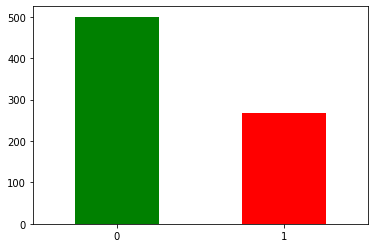

In [5]:
data.Outcome.value_counts().plot(kind="bar",color=["green","red"])
plt.xticks(rotation=0)

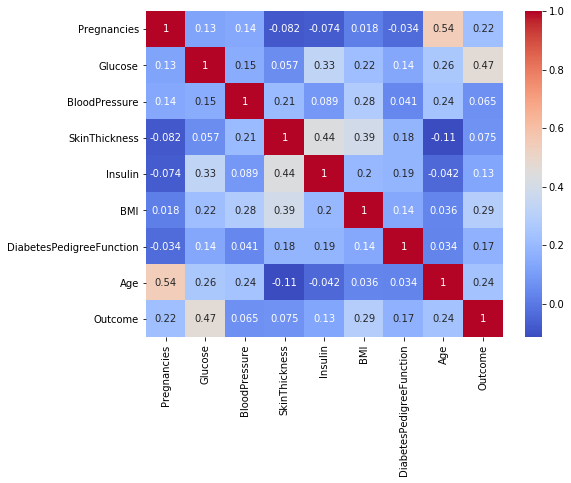

In [6]:
#Correlation Matrix
plt.figure(figsize=(8,6)) 
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

In [7]:
missing_values = data.isnull().sum()

In [8]:
missing_values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
data_raw=data.copy()

In [10]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)


In [11]:
missing_values = data.isnull().sum()
df=pd.DataFrame()
df['Variable']=missing_values.index
df['Missing Values']=missing_values.values
df

,Variable,Missing Values
0,Pregnancies,0
1,Glucose,5
2,BloodPressure,35
3,SkinThickness,227
4,Insulin,374
5,BMI,11
6,DiabetesPedigreeFunction,0
7,Age,0
8,Outcome,0


In [12]:
missing_values_percentage=(data.isnull().sum()/len(data))*100

In [13]:
df1=pd.DataFrame()
df1['Variable']=missing_values_percentage.index
df1['Missing Values Percentage']=missing_values_percentage.values
df1

,Variable,Missing Values Percentage
0,Pregnancies,0.000000
1,Glucose,0.651042
2,BloodPressure,4.557292
3,SkinThickness,29.557292
4,Insulin,48.697917
5,BMI,1.432292
6,DiabetesPedigreeFunction,0.000000
7,Age,0.000000
8,Outcome,0.000000


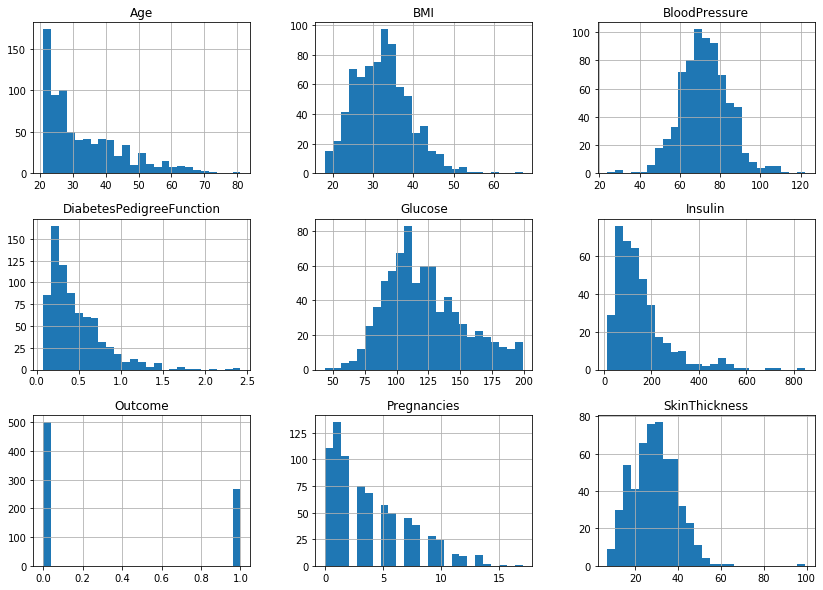

In [14]:
data.hist(bins=25, figsize= (14, 10));

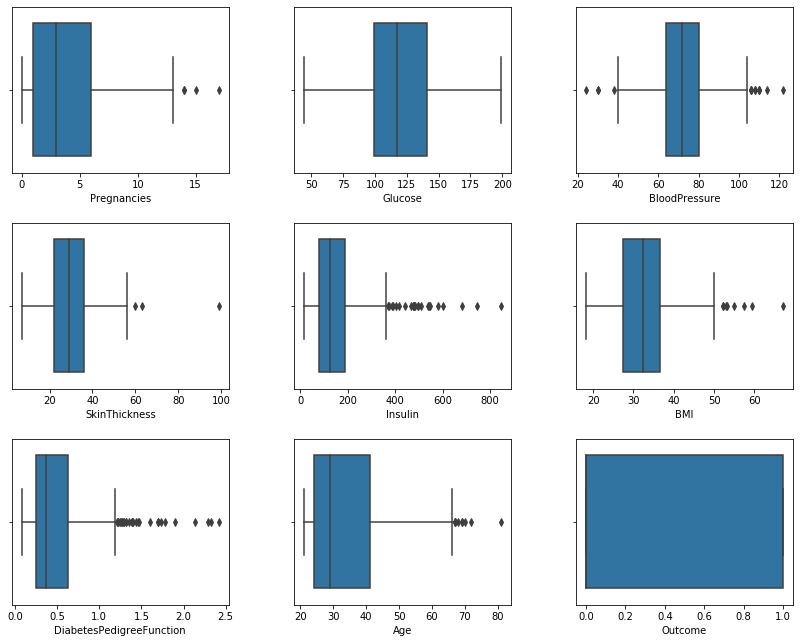

In [15]:
f,axs=plt.subplots(3,3,figsize=(14,11))
plt.subplots_adjust(wspace=0.3, hspace=0.3)


sns.boxplot(data['Pregnancies'],ax=axs[0][0])
sns.boxplot(data['Glucose'],ax=axs[0][1])
sns.boxplot(data['BloodPressure'],ax=axs[0][2])
sns.boxplot(data['SkinThickness'],ax=axs[1][0])
sns.boxplot(data['Insulin'],ax=axs[1][1])
sns.boxplot(data['BMI'],ax=axs[1][2])
sns.boxplot(data['DiabetesPedigreeFunction'],ax=axs[2][0])
sns.boxplot(data['Age'],ax=axs[2][1])
sns.boxplot(data['Outcome'],ax=axs[2][2])


In [16]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(pd.DataFrame(IQR, columns=["IQR"]))

                               IQR
Pregnancies                 5.0000
Glucose                    42.0000
BloodPressure              16.0000
SkinThickness              14.0000
Insulin                   113.7500
BMI                         9.1000
DiabetesPedigreeFunction    0.3825
Age                        17.0000
Outcome                     1.0000


In [17]:
data2 = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Dataset shape before Outliers removal : ",data.shape)
print("Dataset shape after Outliers removal : ",data2.shape)

Dataset shape before Outliers removal :  (768, 9)
Dataset shape after Outliers removal :  (684, 9)


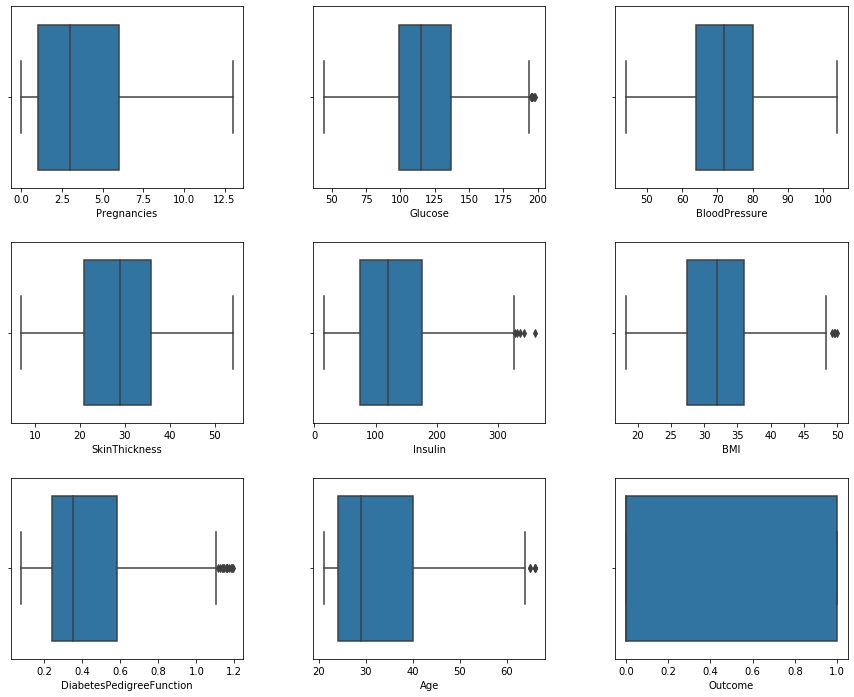

In [18]:
f,axs=plt.subplots(3,3,figsize=(15,12))
plt.subplots_adjust(wspace=0.3, hspace=0.3)


sns.boxplot(data2['Pregnancies'],ax=axs[0][0])
sns.boxplot(data2['Glucose'],ax=axs[0][1])
sns.boxplot(data2['BloodPressure'],ax=axs[0][2])
sns.boxplot(data2['SkinThickness'],ax=axs[1][0])
sns.boxplot(data2['Insulin'],ax=axs[1][1])
sns.boxplot(data2['BMI'],ax=axs[1][2])
sns.boxplot(data2['DiabetesPedigreeFunction'],ax=axs[2][0])
sns.boxplot(data2['Age'],ax=axs[2][1])
sns.boxplot(data2['Outcome'],ax=axs[2][2])


In [19]:
diabetes = data2[(data2['Outcome'] != 0)].copy()
non_diabetes = data2[(data2['Outcome'] == 0)].copy()

In [20]:
def get_median(atr):
    diabetes_tmp=diabetes[diabetes[atr].notnull()]
    non_diabetes_tmp=non_diabetes[non_diabetes[atr].notnull()]
    diabetes_med=diabetes_tmp[[atr]].median().reset_index()
    non_diabetes_med=non_diabetes_tmp[[atr]].median().reset_index()
    print("\nFor '",atr,"' :")
    print("Median of diabetes data =",diabetes_med[0][0])
    print("Median of non-diabetes data =",non_diabetes_med[0][0])
    
    return diabetes_med[0][0],non_diabetes_med[0][0]


In [21]:
def fillbymedian(atr,d_med,n_med):
    diabetes.loc[diabetes[atr].isnull(),atr]=d_med
    non_diabetes.loc[non_diabetes[atr].isnull(),atr]=n_med
    

In [22]:
in_d_med,in_n_med=get_median('Insulin')
gl_d_med,gl_n_med=get_median('Glucose')
st_d_med,st_n_med=get_median('SkinThickness')
bp_d_med,bp_n_med=get_median('BloodPressure')
bmi_d_med,bmi_n_med=get_median('BMI')


For ' Insulin ' :
Median of diabetes data = 160.0
Median of non-diabetes data = 100.0

For ' Glucose ' :
Median of diabetes data = 138.0
Median of non-diabetes data = 107.0

For ' SkinThickness ' :
Median of diabetes data = 32.0
Median of non-diabetes data = 27.0

For ' BloodPressure ' :
Median of diabetes data = 74.0
Median of non-diabetes data = 70.0

For ' BMI ' :
Median of diabetes data = 33.9
Median of non-diabetes data = 30.1


In [23]:
fillbymedian('Insulin',in_d_med,in_n_med)

In [24]:
fillbymedian('Glucose',gl_d_med,gl_n_med)


In [25]:
fillbymedian('SkinThickness',st_d_med,st_n_med)

In [26]:
fillbymedian('BloodPressure',bp_d_med,bp_n_med)

In [27]:
fillbymedian('BMI',bmi_d_med,bmi_n_med)

In [28]:
filled_data=pd.concat([diabetes,non_diabetes],ignore_index=True)

In [29]:
filled_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,160.0,33.6,0.627,50,1
1,8,183.0,64.0,32.0,160.0,23.3,0.672,32,1
2,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
3,8,125.0,96.0,32.0,160.0,33.9,0.232,54,1
4,10,168.0,74.0,32.0,160.0,38.0,0.537,34,1
...,...,...,...,...,...,...,...,...,...
679,9,89.0,62.0,27.0,100.0,22.5,0.142,33,0
680,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
681,2,122.0,70.0,27.0,100.0,36.8,0.340,27,0
682,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0


In [30]:
shuffled_data=filled_data.sample(frac=1,random_state=0)

In [31]:
shuffled_data.reset_index(drop=True)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,133.0,102.0,28.0,140.0,32.8,0.234,45,1
1,3,122.0,78.0,27.0,100.0,23.0,0.254,40,0
2,5,105.0,72.0,29.0,325.0,36.9,0.159,28,0
3,0,123.0,88.0,37.0,100.0,35.2,0.197,29,0
4,0,93.0,60.0,25.0,92.0,28.7,0.532,22,0
...,...,...,...,...,...,...,...,...,...
679,1,115.0,70.0,30.0,96.0,34.6,0.529,32,1
680,0,104.0,76.0,27.0,100.0,18.4,0.582,27,0
681,0,162.0,76.0,36.0,160.0,49.6,0.364,26,1
682,1,99.0,58.0,10.0,100.0,25.4,0.551,21,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000208120B6988>,
      dtype=object)

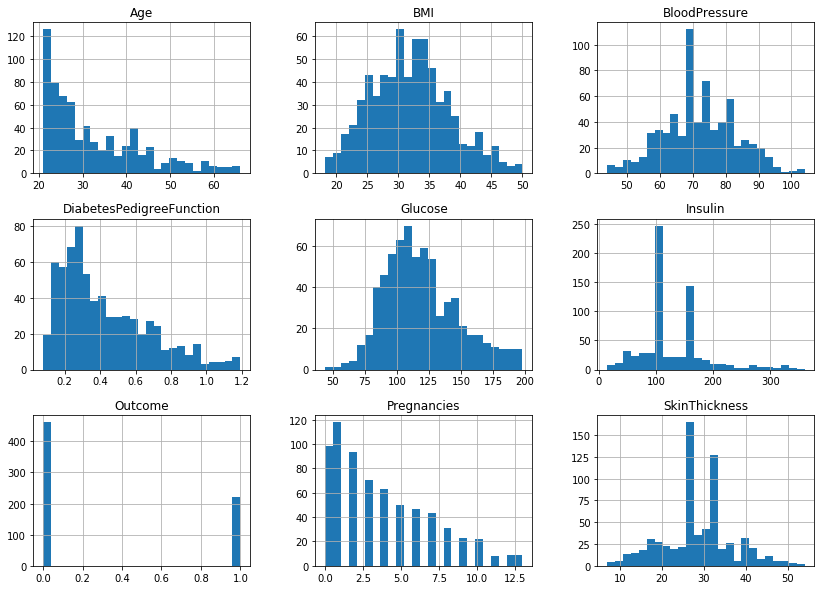

In [32]:
shuffled_data.hist(bins=25, figsize=(14, 10))

In [33]:
dt_cp = shuffled_data.copy()

In [34]:
dt_cp['Age']=np.log(dt_cp['Age'])
dt_cp['DiabetesPedigreeFunction']=np.log(dt_cp['DiabetesPedigreeFunction'])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000208132FE448>,
      dtype=object)

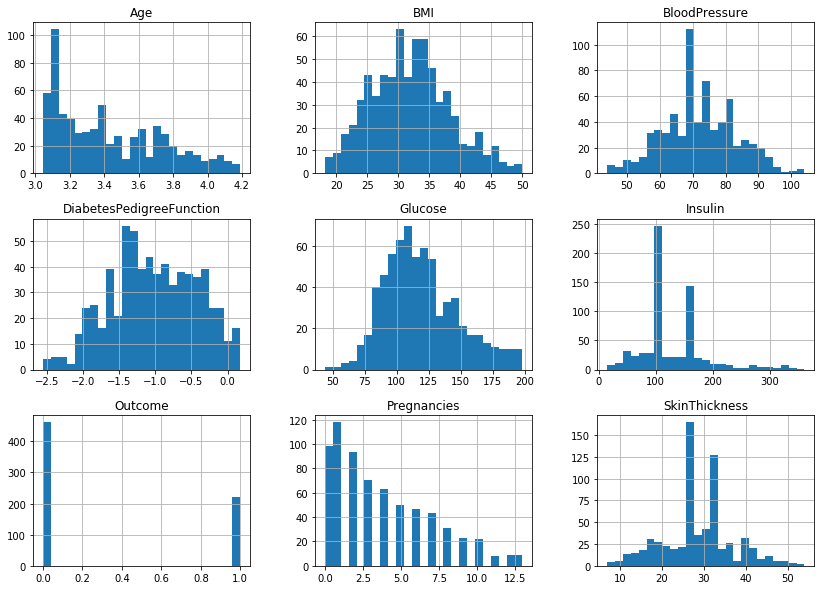

In [35]:
dt_cp.hist(bins=25, figsize=(14, 10))

In [36]:
X=dt_cp.drop(['Outcome'],axis=1)
y=dt_cp.Outcome

In [37]:

print('Original dataset shape {}'.format(Counter(y)))

#Over sample using SMOTE to handle imbalanced data
smt = SMOTE(random_state=40)
X_smt, Y_smt = smt.fit_sample(X, y)
print('New dataset shape {}'.format(Counter(Y_smt)))

Original dataset shape Counter({0: 462, 1: 222})
New dataset shape Counter({1: 462, 0: 462})


In [38]:
X_smt

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,133.000000,102.000000,28.000000,140.000000,32.800000,-1.452434,3.806662
1,3,122.000000,78.000000,27.000000,100.000000,23.000000,-1.370421,3.688879
2,5,105.000000,72.000000,29.000000,325.000000,36.900000,-1.838851,3.332205
3,0,123.000000,88.000000,37.000000,100.000000,35.200000,-1.624552,3.367296
4,0,93.000000,60.000000,25.000000,92.000000,28.700000,-0.631112,3.091042
...,...,...,...,...,...,...,...,...
919,6,162.930711,62.792133,25.650126,175.000000,28.204276,-0.531860,3.794596
920,0,143.323877,66.107959,27.107959,128.892041,37.688048,-0.919587,3.384731
921,1,132.286019,66.367434,40.183717,160.000000,35.163470,-1.388822,3.205412
922,7,126.171787,92.718997,32.000000,160.000000,35.118658,-1.129163,3.900381


In [39]:
sc_X = StandardScaler()
cols=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
'BMI', 'DiabetesPedigreeFunction', 'Age']
X_smt =  sc_X.fit_transform(X_smt[cols])

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_smt, Y_smt, test_size=0.25, random_state=40)

# Logistic Regression

In [41]:
#Let's apply simple logistic regression on the raw data (Before data cleaning and data preprocessing)
lr=LogisticRegression(max_iter=300)

X_tmp=data_raw.drop(['Outcome'],axis=1)
y_tmp=data_raw.Outcome

X_train_tmp, X_test_tmp, y_train_tmp, y_test_tmp = train_test_split(X_tmp, y_tmp, test_size=0.25, random_state=40)

lr.fit(X_train_tmp,y_train_tmp)

y_pred_tmp=lr.predict(X_test_tmp)
print(classification_report(y_test_tmp,y_pred_tmp))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79       119
           1       0.68      0.49      0.57        73

    accuracy                           0.72       192
   macro avg       0.71      0.68      0.68       192
weighted avg       0.71      0.72      0.71       192



In [42]:
#Logistic regression on cleaned and preprocessed data  
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
y_pred=lr.predict(X_test)

In [44]:
print("Accuracy = ", lr.score(X_test, y_test)*100)

Accuracy =  81.81818181818183


In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       117
           1       0.79      0.86      0.82       114

    accuracy                           0.82       231
   macro avg       0.82      0.82      0.82       231
weighted avg       0.82      0.82      0.82       231



# Random Forest

In [46]:
rf=RandomForestClassifier(verbose=2)

In [47]:
rf.fit(X_train,y_train)

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=2, warm_start=False)

In [48]:
predy=rf.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [49]:
print(classification_report(y_test,predy))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       117
           1       0.87      0.88      0.87       114

    accuracy                           0.87       231
   macro avg       0.87      0.87      0.87       231
weighted avg       0.87      0.87      0.87       231



In [50]:
#Fine Tune the parameters for Random Forest using Grid Search Cross Validation
n_estimators = list(np.linspace(100,1400,num=14,dtype=int))

max_depth = list(np.linspace(100, 700, num = 7, dtype=int))
max_depth.append(None)

grid = {
 'n_estimators': n_estimators,
 'max_depth': max_depth
 }

rfc_cv = GridSearchCV(estimator = rf, param_grid = grid, cv = 3, verbose=2, n_jobs = -1)

In [51]:
rfc_cv.fit(X_train,y_train)

Fitting 3 folds for each of 112 candidates, totalling 336 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 336 out of 336 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.2s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [52]:
#Best parameters
rfc_cv.best_params_

{'max_depth': 400, 'n_estimators': 200}

In [53]:
#Randomforest with best parameters
rfc_best = RandomForestClassifier(n_estimators=200, max_depth=400)
rfc_best.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=400, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [54]:
pred_cv=rfc_best.predict(X_test)

In [55]:
print(classification_report(y_test,pred_cv))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90       117
           1       0.88      0.91      0.90       114

    accuracy                           0.90       231
   macro avg       0.90      0.90      0.90       231
weighted avg       0.90      0.90      0.90       231



# Support Vector Classifier

In [56]:
from sklearn import svm

In [57]:
clf =svm.SVC()
clf.fit(X_train,y_train)
svm_pred=clf.predict(X_test)

In [58]:
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87       117
           1       0.85      0.91      0.88       114

    accuracy                           0.87       231
   macro avg       0.88      0.87      0.87       231
weighted avg       0.88      0.87      0.87       231



# KNN

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
train_acc=[]
test_acc=[]

for i in range(1,20):
    knn=KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_acc.append(knn.score(X_train,y_train))
    test_acc.append(knn.score(X_test,y_test))

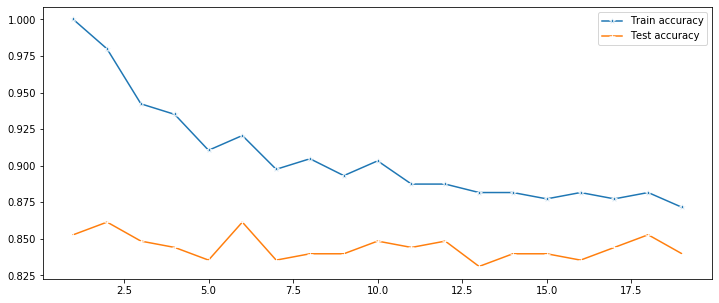

In [61]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,20),train_acc,marker='*',label='Train accuracy')
p = sns.lineplot(range(1,20),test_acc,marker='+',label='Test accuracy')


In [62]:
knn_best=KNeighborsClassifier(6)
knn_best.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [63]:
y_pred_knn=knn.predict(X_test)


In [64]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.92      0.75      0.83       117
           1       0.79      0.93      0.85       114

    accuracy                           0.84       231
   macro avg       0.85      0.84      0.84       231
weighted avg       0.85      0.84      0.84       231

